In [1]:
# Paramètre(s) du notebook

# VERBOSE=True
VERBOSE=True

OPTIONS=""
if not VERBOSE:
    OPTIONS="--quiet"

In [2]:
!pip install geopandas $OPTIONS
!pip install plotly $OPTIONS
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd 
import plotly.express as px
from IPython.core.display import display, HTML

/tmp/ipykernel_1113/1024625163.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
def asciiprint(variable,desc):
    print("-"*100)
    print(variable,":",desc)
    print("-"*100)

def showgraph(departements,df,dep_idf,df_idf,var,color,label):
    asciiprint(var,label)
    fig, ax = plt.subplots(figsize=(10,10))

    departements.plot(color='gray', ax=ax)
    df.plot(column=var, 
                        cmap=color, 
                        linewidth=0.5, 
                        edgecolor='black',
                        ax=ax, 
                        legend=True,
                        legend_kwds={'label': label, 'orientation': "horizontal"})
    ax.set_axis_off()
    
    fig, ax = plt.subplots(figsize=(10,10))

    dep_idf.plot(color='gray', ax=ax)
    df_idf.plot(column=var, 
                        cmap=color, 
                        linewidth=0.5, 
                        edgecolor='black',
                        ax=ax, 
                        legend=True,
                        legend_kwds={'label': label, 'orientation': "horizontal"})
    ax.set_axis_off()

In [5]:
%store -r donnees_filo_ind_communes_2019
display(donnees_filo_ind_communes_2019)

,CODGEO,NBMENFISC19,NBPERSMENFISC19,MED19,PIMP19,TP6019,TP60AGE119,TP60AGE219,TP60AGE319,TP60AGE419,...,PPEN19,PPAT19,PPSOC19,PPFAM19,PPMINI19,PPLOGT19,PIMPOT19,D119,D919,RD19
0,01001,322,819,23970,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,01002,113,263,23640,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
2,01004,6711,15040,20510,56,18,21,23,21,16,...,"25,6","12,3","7,7","2,8","3,1","1,8","-15,7",11080,35230,"3,2"
3,01005,720,1823,24050,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
4,01006,s,s,s,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34915,97420,8339,23843,16710,33,35,53,40,33,33,...,"12,3","4,5","16,9","4,6","9,2","3,1","-12,1",8630,34980,"4,1"
34916,97421,2463,6927,12340,16,55,s,60,58,54,...,"14,1","4,3",28,"6,3","18,4","3,3","-8,1",6540,24490,"3,7"
34917,97422,30048,77963,15320,30,39,56,44,40,38,...,"20,1","7,3","18,2","4,5",10,"3,7","-12,1",8140,33910,"4,2"
34918,97423,2418,6982,15750,31,37,s,41,36,34,...,"14,3",4,"17,4","4,3",11,"2,1",-11,8280,31120,"3,8"


In [6]:
url_com = 'https://www.data.gouv.fr/fr/datasets/r/61b8f19d-66ce-4ad3-a9c4-82502dc9d550'
communes = gpd.read_file(url_com)
communes

,insee,nom,wikipedia,surf_ha,geometry
0,97223,Saint-Esprit,fr:Saint-Esprit (Martinique),2318.0,"POLYGON ((-60.95617 14.55766, -60.95561 14.557..."
1,97233,Le Morne-Vert,fr:Le Morne-Vert,1325.0,"POLYGON ((-61.15922 14.70645, -61.15917 14.706..."
2,97208,Fonds-Saint-Denis,fr:Fonds-Saint-Denis,2374.0,"POLYGON ((-61.16254 14.74252, -61.16232 14.743..."
3,97224,Saint-Joseph,fr:Saint-Joseph (Martinique),4324.0,"POLYGON ((-61.08680 14.71891, -61.08678 14.719..."
4,97212,Gros-Morne,fr:Gros-Morne,4601.0,"POLYGON ((-61.08483 14.72449, -61.08481 14.724..."
...,...,...,...,...,...
34965,92049,Montrouge,fr:Montrouge,206.0,"POLYGON ((2.30002 48.81132, 2.30023 48.81151, ..."
34966,75056,Paris,fr:Paris,10538.0,"POLYGON ((2.22412 48.85420, 2.22416 48.85461, ..."
34967,76530,Robertot,fr:Robertot,249.0,"POLYGON ((0.68280 49.71467, 0.68361 49.71484, ..."
34968,76483,Oherville,fr:Oherville,450.0,"POLYGON ((0.66616 49.73023, 0.66618 49.73036, ..."


In [7]:
communes = communes[["insee", "geometry"]]
communes.columns = ["CODGEO", "geometry"]
communes

,CODGEO,geometry
0,97223,"POLYGON ((-60.95617 14.55766, -60.95561 14.557..."
1,97233,"POLYGON ((-61.15922 14.70645, -61.15917 14.706..."
2,97208,"POLYGON ((-61.16254 14.74252, -61.16232 14.743..."
3,97224,"POLYGON ((-61.08680 14.71891, -61.08678 14.719..."
4,97212,"POLYGON ((-61.08483 14.72449, -61.08481 14.724..."
...,...,...
34965,92049,"POLYGON ((2.30002 48.81132, 2.30023 48.81151, ..."
34966,75056,"POLYGON ((2.22412 48.85420, 2.22416 48.85461, ..."
34967,76530,"POLYGON ((0.68280 49.71467, 0.68361 49.71484, ..."
34968,76483,"POLYGON ((0.66616 49.73023, 0.66618 49.73036, ..."


In [16]:
#Restriction au champ IDF pour une sous-carte
communes_idf = communes.loc[communes['CODGEO'].str.slice(0, 2).isin(['75','77','78','91','92','93','94','95'])]
if VERBOSE:
    display(communes_idf)
communes_idf.sort_values(by=['CODGEO'])

,CODGEO,geometry
3045,91148,"POLYGON ((2.15000 48.50944, 2.15287 48.50948, ..."
3046,77395,"POLYGON ((2.47361 48.27058, 2.47758 48.27101, ..."
3047,77003,"POLYGON ((2.50261 48.28749, 2.50310 48.28754, ..."
3048,77041,"POLYGON ((2.45610 48.32177, 2.45994 48.32128, ..."
3049,77220,"POLYGON ((2.53439 48.25089, 2.53526 48.25150, ..."
...,...,...
31645,92009,"POLYGON ((2.25703 48.91094, 2.25714 48.91093, ..."
31646,92025,"POLYGON ((2.22043 48.92060, 2.22290 48.92241, ..."
34964,92046,"POLYGON ((2.27440 48.81346, 2.27815 48.81433, ..."
34965,92049,"POLYGON ((2.30002 48.81132, 2.30023 48.81151, ..."


,CODGEO,geometry
34966,75056,"POLYGON ((2.22412 48.85420, 2.22416 48.85461, ..."
14615,77001,"POLYGON ((2.54115 48.32594, 2.54200 48.32794, ..."
18045,77002,"POLYGON ((3.10659 48.71325, 3.10664 48.71423, ..."
3047,77003,"POLYGON ((2.50261 48.28749, 2.50310 48.28754, ..."
17963,77004,"POLYGON ((2.76570 48.60594, 2.76572 48.60596, ..."
...,...,...
3114,95676,"POLYGON ((1.70345 49.07909, 1.70371 49.07954, ..."
23544,95678,"POLYGON ((2.20277 49.06492, 2.20311 49.06497, ..."
22761,95680,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ..."
22765,95682,"POLYGON ((2.36722 49.06828, 2.37024 49.07275, ..."


In [17]:
donnees_filo_ind_communes_2019.index.names = ['CODCOM']

if VERBOSE:
    display(donnees_filo_ind_communes_2019.describe())
donnees_filo_ind_communes_2019_pauvrete = donnees_filo_ind_communes_2019['TP6019'].to_frame()
donnees_filo_ind_communes_2019_rev_median = donnees_filo_ind_communes_2019['MED19'].to_frame()
donnees_filo_ind_communes_2019_ratio_d1_d9 = donnees_filo_ind_communes_2019['RD19'].to_frame()
donnees_filo_ind_communes_2019_pauvrete

,CODGEO,NBMENFISC19,NBPERSMENFISC19,MED19,PIMP19,TP6019,TP60AGE119,TP60AGE219,TP60AGE319,TP60AGE419,...,PPEN19,PPAT19,PPSOC19,PPFAM19,PPMINI19,PPLOGT19,PIMPOT19,D119,D919,RD19
count,34920,34920,34920,34920,34920,34920,34920,34920,34920,34920,...,34920,34920,34920,34920,34920,34920,34920,34920,34920,34920
unique,34920,3776,5732,1967,71,47,50,54,52,45,...,447,279,196,71,117,58,246,951,2157,59
top,01001,s,s,s,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
freq,1,3569,3569,3569,29577,30552,34178,33468,33238,33627,...,29584,29584,29584,29584,29584,29584,29584,29584,29584,29584


,TP6019
CODCOM,
0,s
1,s
2,18
3,s
4,s
...,...
34915,35
34916,55
34917,39


In [18]:
carto_pauvrete=communes.merge(donnees_filo_ind_communes_2019_pauvrete,left_index=True,right_index=True)
carto_rev_median=communes.merge(donnees_filo_ind_communes_2019_rev_median,left_index=True,right_index=True)
carto_ratio_d1_d9=communes.merge(donnees_filo_ind_communes_2019_ratio_d1_d9,left_index=True,right_index=True)
carto_pauvrete

,CODGEO,geometry,TP6019
0,97223,"POLYGON ((-60.95617 14.55766, -60.95561 14.557...",s
1,97233,"POLYGON ((-61.15922 14.70645, -61.15917 14.706...",s
2,97208,"POLYGON ((-61.16254 14.74252, -61.16232 14.743...",18
3,97224,"POLYGON ((-61.08680 14.71891, -61.08678 14.719...",s
4,97212,"POLYGON ((-61.08483 14.72449, -61.08481 14.724...",s
...,...,...,...
34915,59101,"POLYGON ((4.14917 50.27674, 4.14919 50.27687, ...",35
34916,59157,"POLYGON ((4.11292 50.22725, 4.11364 50.22767, ...",55
34917,59151,"POLYGON ((4.03575 50.26460, 4.03629 50.26462, ...",39
34918,59324,"POLYGON ((4.07906 50.30975, 4.08042 50.30962, ...",37


In [21]:
#Restriction au champ IDF pour une sous-carte

carto_pauvrete_idf = carto_pauvrete.loc[carto_pauvrete['CODGEO'].str.slice(0, 2).isin(['75','77','78','91','92','93','94','95'])]
carto_rev_median_idf = carto_rev_median.loc[carto_rev_median['CODGEO'].str.slice(0, 2).isin(['75','77','78','91','92','93','94','95'])]
carto_ratio_d1_d9_idf = carto_ratio_d1_d9.loc[carto_ratio_d1_d9['CODGEO'].str.slice(0, 2).isin(['75','77','78','91','92','93','94','95'])]


----------------------------------------------------------------------------------------------------
TP6019 : Taux de pauvreté monétaire (au seuil de 60% du niveau de vie médian)
----------------------------------------------------------------------------------------------------


TypeError: __init__() got an unexpected keyword argument 'label'

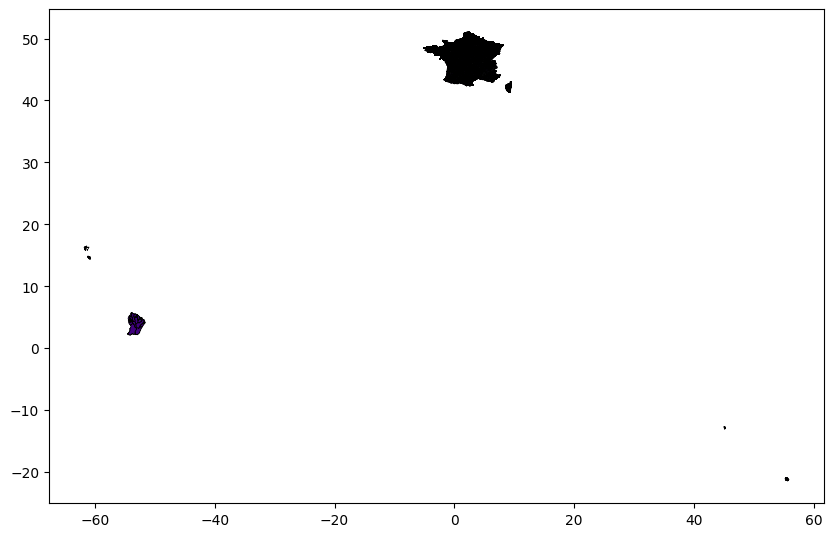

In [22]:
showgraph(communes,carto_pauvrete,communes_idf,carto_pauvrete_idf,'TP6019','Purples','Taux de pauvreté monétaire (au seuil de 60% du niveau de vie médian)')


In [ ]:
showgraph(communes,carto_rev_median,communes_idf,carto_rev_median_idf,'MED19','Oranges','Niveau de vie médian (en euros)')